In [35]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [36]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHES=50

In [37]:
dataset =tf.keras.preprocessing.image_dataset_from_directory(
   "PlantVillage",
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE

)

Found 2152 files belonging to 3 classes.


In [38]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [39]:
len(dataset)

68

In [40]:
32*68


2176

In [41]:
# almost     same . In one batch training  68 image will fed to train


In [42]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 0 0 0 1 0 0 1 2 0 1 2 0 0 0 0 0 1 0 0 1 1 1 0 0 2 0 0 2 0 0]


In [43]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0] )
     

tf.Tensor(
[[[182. 186. 198.]
  [185. 189. 201.]
  [182. 186. 198.]
  ...
  [185. 189. 200.]
  [183. 187. 198.]
  [181. 185. 196.]]

 [[180. 184. 196.]
  [183. 187. 199.]
  [179. 183. 195.]
  ...
  [185. 189. 200.]
  [183. 187. 198.]
  [182. 186. 197.]]

 [[179. 183. 195.]
  [181. 185. 197.]
  [177. 181. 193.]
  ...
  [184. 188. 199.]
  [182. 186. 197.]
  [181. 185. 196.]]

 ...

 [[132. 130. 143.]
  [129. 127. 140.]
  [132. 130. 143.]
  ...
  [120. 122. 134.]
  [126. 128. 140.]
  [141. 143. 155.]]

 [[127. 125. 138.]
  [127. 125. 138.]
  [134. 132. 145.]
  ...
  [122. 124. 136.]
  [121. 123. 135.]
  [121. 123. 135.]]

 [[126. 124. 137.]
  [129. 127. 140.]
  [139. 137. 150.]
  ...
  [127. 129. 141.]
  [129. 131. 143.]
  [134. 136. 148.]]], shape=(256, 256, 3), dtype=float32)


In [44]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0] .numpy())
     
   

[[[187. 184. 191.]
  [187. 184. 191.]
  [188. 185. 192.]
  ...
  [181. 180. 188.]
  [181. 180. 188.]
  [182. 181. 189.]]

 [[189. 186. 193.]
  [189. 186. 193.]
  [190. 187. 194.]
  ...
  [180. 179. 187.]
  [180. 179. 187.]
  [181. 180. 188.]]

 [[190. 187. 194.]
  [190. 187. 194.]
  [191. 188. 195.]
  ...
  [179. 178. 186.]
  [180. 179. 187.]
  [181. 180. 188.]]

 ...

 [[159. 154. 160.]
  [153. 148. 154.]
  [146. 141. 147.]
  ...
  [145. 143. 154.]
  [140. 138. 151.]
  [139. 137. 150.]]

 [[156. 151. 157.]
  [150. 145. 151.]
  [143. 138. 144.]
  ...
  [144. 142. 153.]
  [140. 138. 151.]
  [135. 133. 146.]]

 [[159. 154. 160.]
  [153. 148. 154.]
  [147. 142. 148.]
  ...
  [145. 143. 154.]
  [144. 142. 155.]
  [138. 136. 149.]]]


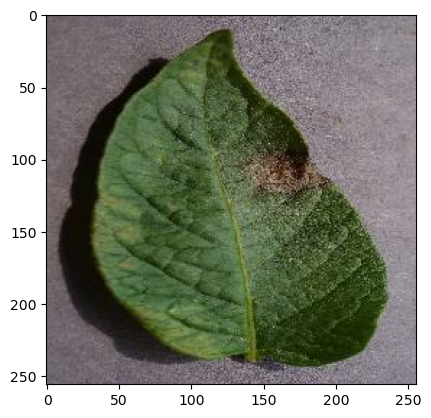

In [45]:
for image_batch,label_batch in dataset.take(1):
     plt.imshow(image_batch[0].numpy().astype("uint8"))

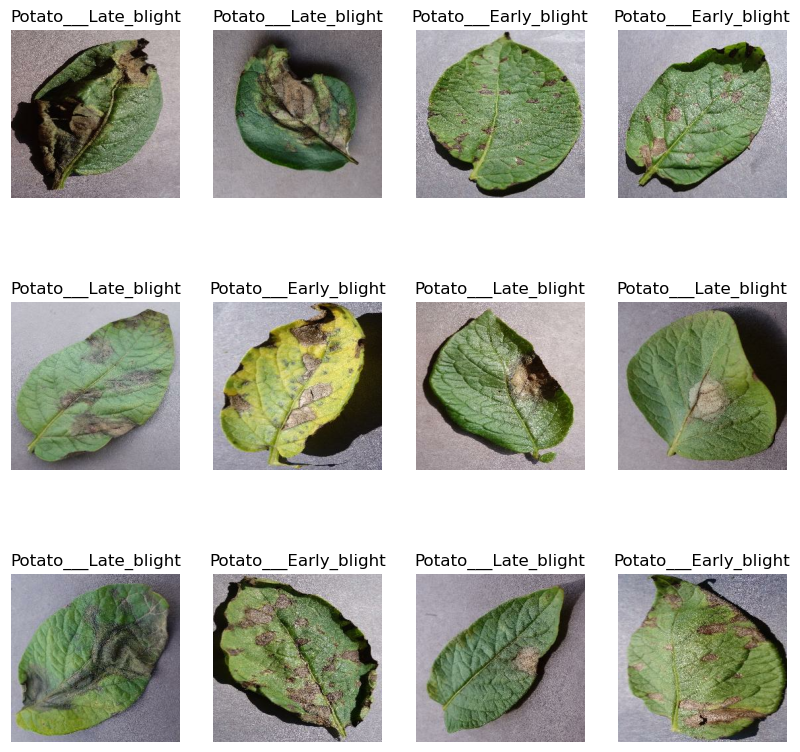

In [46]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range (12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [47]:
len(dataset)

68

In [48]:
#actual is 68 image 

In [49]:
### 80% ==> training
### 20% ==> 10% validation, 10% test

In [50]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [51]:
train_ds=dataset.take(54)
len(train_ds)

54

In [52]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [53]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [54]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [55]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [56]:
#Goal of this  below function is to take tensorflow dataset  and give split ratio


In [57]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1, shuffle=True , shuffle_size=10000):
    
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).skip(val_size)
    
    
    
    return train_ds,val_ds,test_ds

In [58]:
 train_ds,val_ds,test_ds =get_dataset_partitions_tf(dataset)

In [59]:
len(train_ds)

54

In [60]:
len(val_ds)

8

In [61]:
len(test_ds)

8

In [62]:
# prefetch concept CPU AND GPU Increase th performance  so we create this     below function

In [63]:
train_ds=train_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [64]:
# below function is to make same size of input image 

In [65]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [66]:
data_augmentation=tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     layers.experimental.preprocessing.RandomRotation(0.2)
])

In [75]:
#model building

In [70]:



input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

model.build(input_shape=input_shape)

In [71]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [72]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
    


)

In [74]:
history=model.fit(
    train_ds,
    epochs=EPOCHES,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds


)

Epoch 1/50
54/54 [==============================] - 115s 2s/step - loss: 0.8857 - accuracy: 0.4988 - val_loss: 0.7943 - val_accuracy: 0.5039
Epoch 2/50
54/54 [==============================] - 108s 2s/step - loss: 0.6311 - accuracy: 0.7164 - val_loss: 0.3764 - val_accuracy: 0.8320
Epoch 3/50
54/54 [==============================] - 109s 2s/step - loss: 0.3948 - accuracy: 0.8374 - val_loss: 0.2827 - val_accuracy: 0.8867
Epoch 4/50
54/54 [==============================] - 109s 2s/step - loss: 0.2919 - accuracy: 0.8738 - val_loss: 0.2689 - val_accuracy: 0.8945
Epoch 5/50
54/54 [==============================] - 108s 2s/step - loss: 0.2368 - accuracy: 0.9109 - val_loss: 0.1197 - val_accuracy: 0.9648
Epoch 6/50
54/54 [==============================] - 109s 2s/step - loss: 0.2206 - accuracy: 0.9051 - val_loss: 0.2121 - val_accuracy: 0.9219
Epoch 7/50
54/54 [==============================] - 113s 2s/step - loss: 0.2069 - accuracy: 0.9207 - val_loss: 0.1267 - val_accuracy: 0.9453
Epoch 8/50
54

In [81]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 5s 409ms/step - loss: 0.0832 - accuracy: 0.9741


In [82]:
scores

[0.0831572413444519, 0.9741379022598267]

In [77]:
history

In [78]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [80]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [83]:
history.history['accuracy']

[0.49884259700775146,
 0.7164351940155029,
 0.8373842835426331,
 0.8738425970077515,
 0.9108796119689941,
 0.9050925970077515,
 0.9207175970077515,
 0.9311342835426331,
 0.9375,
 0.9484953880310059,
 0.9594907164573669,
 0.9542824029922485,
 0.9583333134651184,
 0.9664351940155029,
 0.9479166865348816,
 0.9629629850387573,
 0.9728009104728699,
 0.9780092835426331,
 0.9791666865348816,
 0.9762731194496155,
 0.9785879850387573,
 0.9820601940155029,
 0.9716435074806213,
 0.9681712985038757,
 0.9814814925193787,
 0.9907407164573669,
 0.9895833134651184,
 0.9907407164573669,
 0.9861111044883728,
 0.9901620149612427,
 0.9768518805503845,
 0.9797453880310059,
 0.9901620149612427,
 0.9861111044883728,
 0.984375,
 0.9861111044883728,
 0.9872685074806213,
 0.9884259104728699,
 0.9924768805503845,
 0.9942129850387573,
 0.9861111044883728,
 0.9895833134651184,
 0.9884259104728699,
 0.9924768805503845,
 0.9942129850387573,
 0.984375,
 0.9901620149612427,
 0.9924768805503845,
 0.9913194179534912,
 0

In [85]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

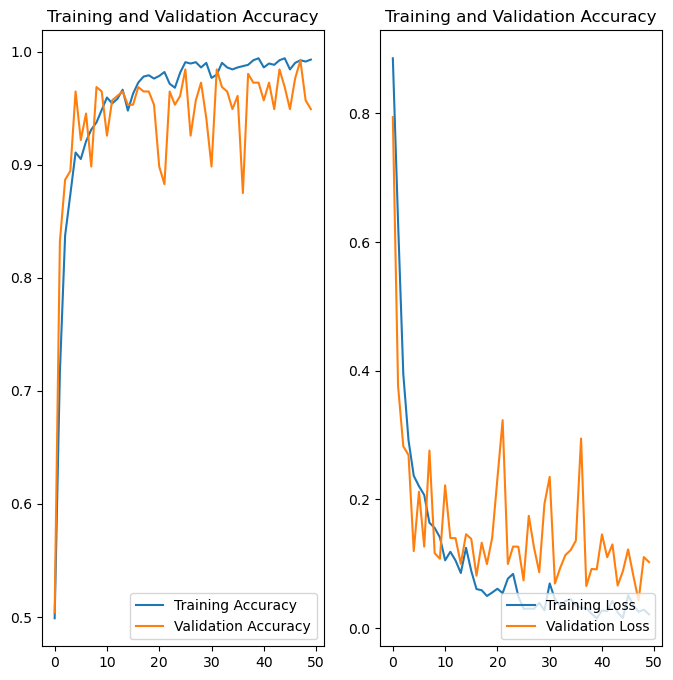

In [91]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHES),acc,label='Training Accuracy')
plt.plot(range(EPOCHES),val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHES),loss,label='Training Loss')
plt.plot(range(EPOCHES),val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()



First image to predict:
Actual label: Potato___Late_blight
1/1 [==============================] - 0s 131ms/step
Predicted label: Potato___Late_blight


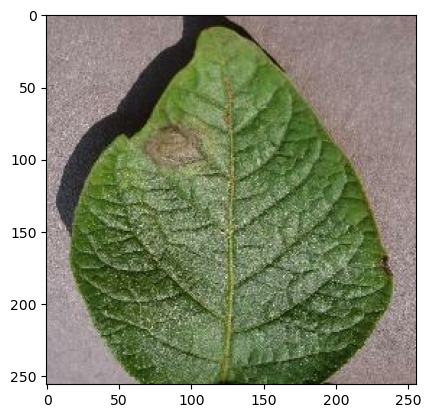

In [110]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("First image to predict:")
    plt.imshow(first_image)
    print("Actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])

In [118]:
def predict(model, img):
    img_array = np.array(img)
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 33ms/step


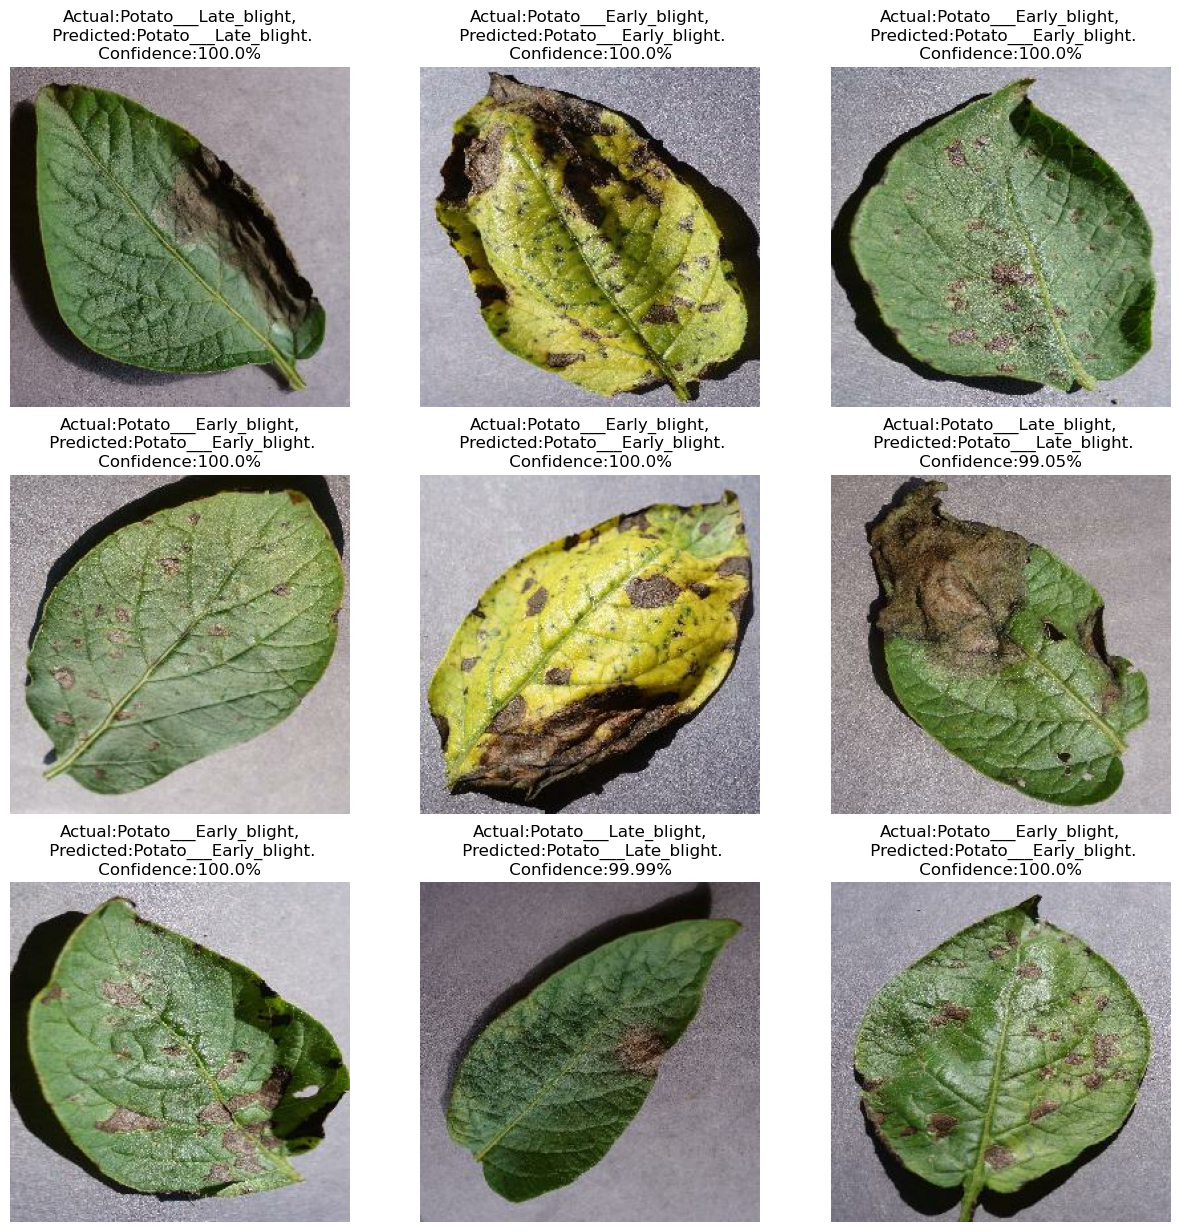

In [120]:
plt.figure(figsize=(15,15))
for images ,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        
        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}% " )
        plt.axis("off")

In [134]:
model_version = 1
model.save("C:/Users/Anchal/Desktop/potato-disease/saved_models/" + str(model_version))

INFO:tensorflow:Assets written to: C:/Users/Anchal/Desktop/potato-disease/saved_models/1\assets


INFO:tensorflow:Assets written to: C:/Users/Anchal/Desktop/potato-disease/saved_models/1\assets
